In [ ]:
from finquant.portfolio import build_portfolio
import pandas as pd
import numpy as np
import quandl
import datetime
from finquant.moving_average import ema
import matplotlib.pyplot as plt

In [6]:
# quandl.api_config.api_key = "XvQviGH8LNdUHEUFgnXj"

d = {
    0: {"Name": "CM.TO", "Allocation": 20},
    1: {"Name": "BNS.TO", "Allocation": 10},
    2: {"Name": "NA.TO", "Allocation": 15},
    3: {"Name": "TD.TO", "Allocation": 18}
}

pf_allocation = pd.DataFrame.from_dict(d, orient="index")
names = pf_allocation["Name"].values.tolist()
start_date = datetime.datetime(2020, 3, 1)
end_date = "2020-04-30"
pf = build_portfolio(
    names=names, pf_allocation=pf_allocation, start_date=start_date, end_date=end_date, data_api="yfinance"
)
# print(pf.portfolio)
pf.data.head(5)

[*********************100%***********************]  4 of 4 completed


,CM.TO,BNS.TO,NA.TO,TD.TO
Date,,,,
2020-03-02,99.995804,68.310654,68.221581,67.693100
2020-03-03,98.217064,67.410423,66.797249,66.076485
2020-03-04,100.295471,68.465538,67.236252,66.845833
2020-03-05,98.091400,66.558601,64.670502,65.531120
2020-03-06,95.693970,64.942070,60.777981,63.739216


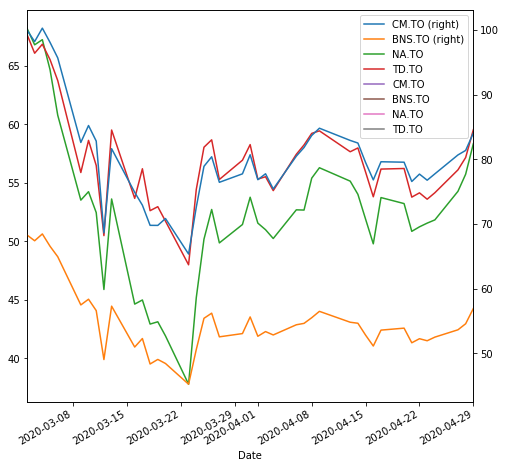

In [10]:
ax = pf.data.plot(secondary_y=["CM.TO", "BNS.TO"], grid=True, figsize=(8,8))
# computing exponential moving average and plotting it
ema(pf.data).plot(ax=ax, secondary_y=["WIKI/MCD", "WIKI/DIS"])
plt.show()